# Import librairies

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns

# Import dataset

In [114]:
df_trafic = pd.read_parquet('/Users/manu/Desktop/SUP/Projet 2/AI_model_urban_mobility/data/df_final_20250423.parquet')

In [115]:
df_trafic = df_trafic.set_index('horodatage')

In [116]:
df_trafic.columns

Index(['id_technique', 'id', 'debit', 'longueur', 'taux_occupation',
       'code_couleur', 'nom_du_troncon', 'etat_du_trafic', 'temps_de_parcours',
       'vitesse', 'geo_point_2d', 'geometrie', 'shape_geo', 'type_geo',
       'coordinates_geo', 'jour', 'is_vacances', 'is_ferie', 'temperature_2m',
       'visibility', 'precipitation', 'wind_speed_10m', 'gml_id', 'date_ech',
       'code_qual', 'lib_qual', 'coul_qual', 'date_dif', 'source', 'type_zone',
       'code_zone', 'lib_zone', 'code_no2', 'code_so2', 'code_o3', 'code_pm10',
       'code_pm25', 'x_wgs84', 'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg',
       'etat_indice', 'geom_type', 'geom_coordinates', 'geo_point_2d_lon',
       'geo_point_2d_lat', 'has_event_near_troncon', 'heure', 'pluie',
       'is_weekend'],
      dtype='object')

In [118]:
df_trafic.head()

,id_technique,id,debit,longueur,taux_occupation,code_couleur,nom_du_troncon,etat_du_trafic,temps_de_parcours,vitesse,...,etat_indice,geom_type,geom_coordinates,geo_point_2d_lon,geo_point_2d_lat,has_event_near_troncon,heure,pluie,is_weekend,hour
horodatage,,,,,,,,,,,,,,,,,,,,,
2025-02-21 19:52:00,1021-20250221T195200,1021,360,349,4.5,3,Riviere I2,fluide,67,19,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19
2025-02-21 19:52:00,6006-20250221T195200,6006,120,411,3.3,3,Republique P1,fluide,91,16,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19
2025-02-21 19:52:00,7128-20250221T195200,7128,300,180,3.7,3,Ingres P1,fluide,35,19,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19
2025-02-21 19:52:00,2128-20250221T195200,2128,480,208,5.8,3,Ingres I3,fluide,39,19,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19
2025-02-21 19:52:00,113-20250221T195200,113,120,304,1.6,3,Ste Luce I2,fluide,55,20,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19


In [119]:
columns = ['id_technique', 'id', 'debit', 'longueur', 'taux_occupation',
       'code_couleur', 'nom_du_troncon', 'etat_du_trafic', 'temps_de_parcours',
       'vitesse', 'geo_point_2d', 'geometrie', 'shape_geo', 'type_geo',
       'coordinates_geo', 'jour', 'is_vacances', 'is_ferie', 'temperature_2m',
       'visibility', 'precipitation', 'wind_speed_10m', 'gml_id', 'date_ech',
       'code_qual', 'lib_qual', 'coul_qual', 'date_dif', 'source', 'type_zone',
       'code_zone', 'lib_zone', 'code_no2', 'code_so2', 'code_o3', 'code_pm10',
       'code_pm25', 'x_wgs84', 'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg',
       'etat_indice', 'geom_type', 'geom_coordinates', 'geo_point_2d_lon',
       'geo_point_2d_lat', 'has_event_near_troncon', 'pluie',
       'is_weekend']

df_trafic = df_trafic[columns].copy()

# Exploration

## Taux d’occupation moyen par heure Vacances vs Hors Vacances et Semaine vs Week-end

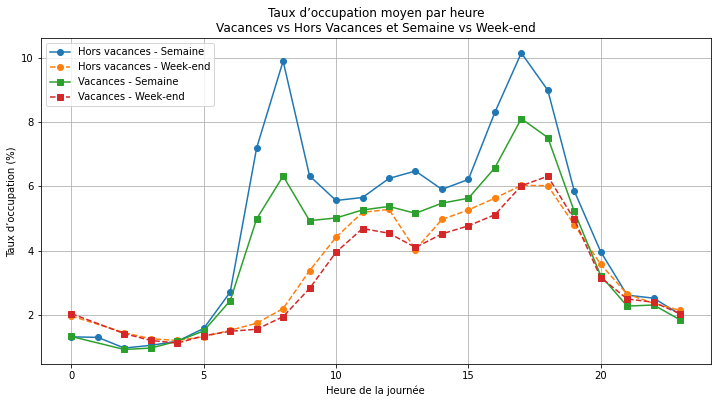

In [120]:
# Ajouter la colonne 'hour' 
df_trafic['hour'] = df_trafic.index.hour

# Moyenne par heure, selon vacances et week-end :
mean_hour = df_trafic.groupby(['hour', 'is_vacances', 'is_weekend'])['taux_occupation'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))

# Hors vacances - semaine
plt.plot(
    mean_hour[(mean_hour['is_vacances'] == 0) & (mean_hour['is_weekend'] == 0)]['hour'],
    mean_hour[(mean_hour['is_vacances'] == 0) & (mean_hour['is_weekend'] == 0)]['taux_occupation'],
    label='Hors vacances - Semaine',
    linestyle='-', marker='o'
)

# Hors vacances - week-end
plt.plot(
    mean_hour[(mean_hour['is_vacances'] == 0) & (mean_hour['is_weekend'] == 1)]['hour'],
    mean_hour[(mean_hour['is_vacances'] == 0) & (mean_hour['is_weekend'] == 1)]['taux_occupation'],
    label='Hors vacances - Week-end',
    linestyle='--', marker='o'
)

# Vacances - semaine
plt.plot(
    mean_hour[(mean_hour['is_vacances'] == 1) & (mean_hour['is_weekend'] == 0)]['hour'],
    mean_hour[(mean_hour['is_vacances'] == 1) & (mean_hour['is_weekend'] == 0)]['taux_occupation'],
    label='Vacances - Semaine',
    linestyle='-', marker='s'
)

# Vacances - week-end
plt.plot(
    mean_hour[(mean_hour['is_vacances'] == 1) & (mean_hour['is_weekend'] == 1)]['hour'],
    mean_hour[(mean_hour['is_vacances'] == 1) & (mean_hour['is_weekend'] == 1)]['taux_occupation'],
    label='Vacances - Week-end',
    linestyle='--', marker='s'
)

plt.title('Taux d’occupation moyen par heure\nVacances vs Hors Vacances et Semaine vs Week-end')
plt.xlabel('Heure de la journée')
plt.ylabel('Taux d’occupation (%)')
plt.legend()
plt.grid(True)
plt.show()


### Conclusion

1 - Hors vacances en semaine (courbe bleue) :
On observe 2 pics, un le matin entre 7h et 9h et un le soir entre 16h et 19h.
2 - Hors vacances en week-end (courbe orange) :
Plus 'plat' sans pic de circulation.
Creux le matin aux horaires de pic de la semaine
3 - En vacances en semaine (courbe verte) :
Suit le même schéma qu'hors vacances mais avec un taux d'occupation moyen plus faible
4 - En vacances en week-end (courbe rouge) :
Très similaires à la même courbe hors vacances.

## Resample

Créer un dataset avec des données pour chaque quart d'heure pour chaque tronçon en vacances

In [135]:
df_trafic['is_ferie'].value_counts()

is_ferie
0    1120779
Name: count, dtype: int64

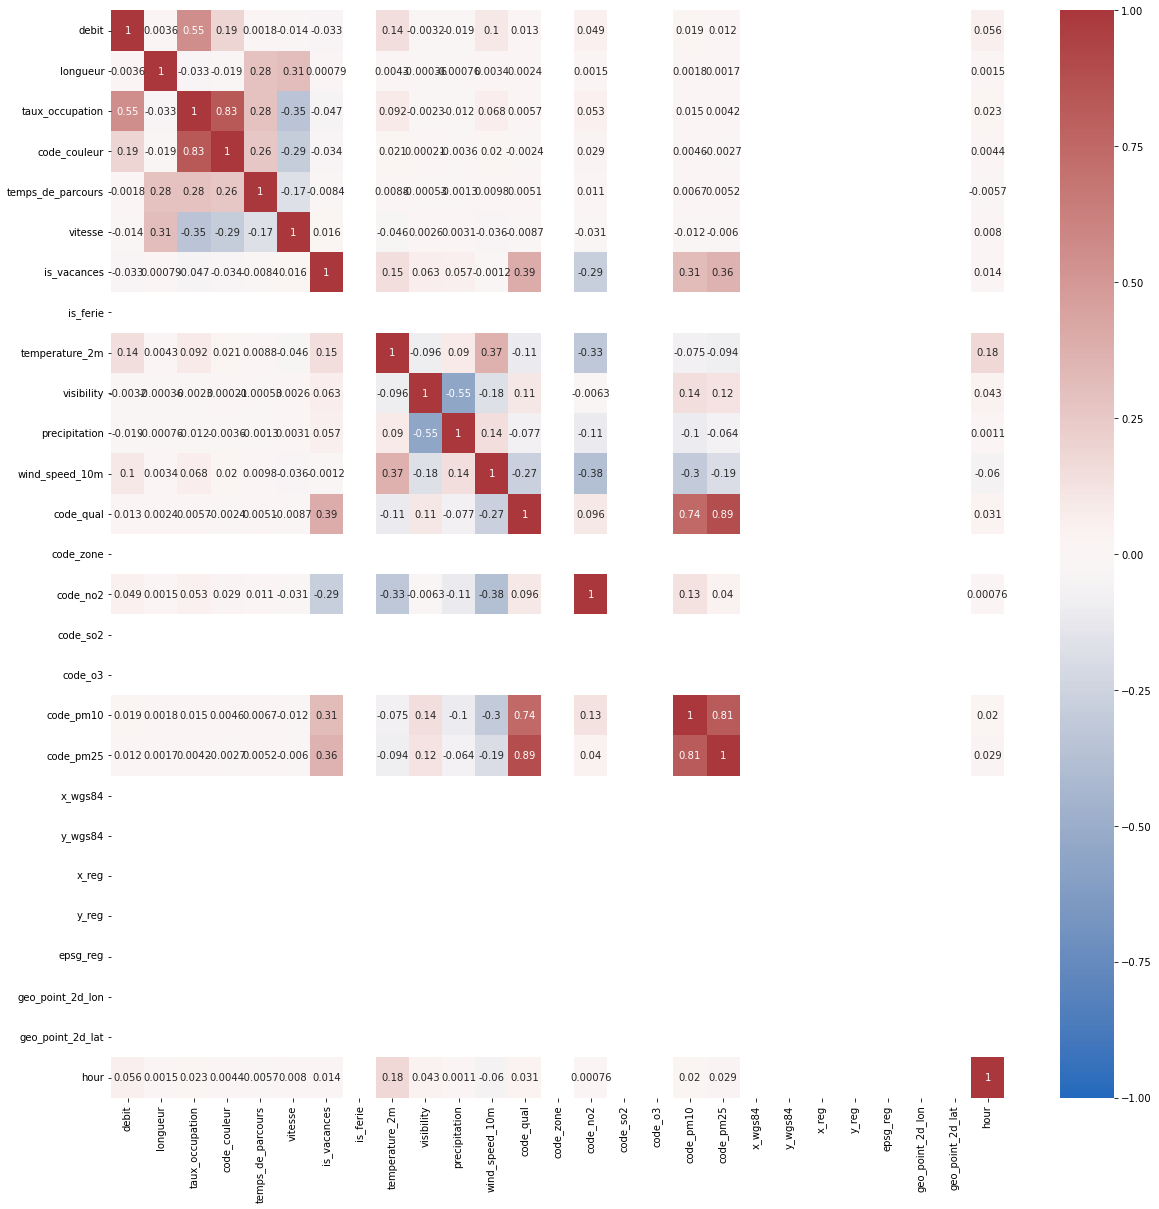

In [133]:
# Valeur numerique uniquement 
corr = df_trafic.select_dtypes('number').corr()

#Afficher une heatmap avec les colonnes corrélées 
plt.figure(figsize=(20,20))
sns.heatmap(corr,
            cmap = "vlag",
            center = 0,
            annot = True,
            vmin = -1,
            vmax = 1)
plt.show()

In [121]:
df_trafic.columns

Index(['id_technique', 'id', 'debit', 'longueur', 'taux_occupation',
       'code_couleur', 'nom_du_troncon', 'etat_du_trafic', 'temps_de_parcours',
       'vitesse', 'geo_point_2d', 'geometrie', 'shape_geo', 'type_geo',
       'coordinates_geo', 'jour', 'is_vacances', 'is_ferie', 'temperature_2m',
       'visibility', 'precipitation', 'wind_speed_10m', 'gml_id', 'date_ech',
       'code_qual', 'lib_qual', 'coul_qual', 'date_dif', 'source', 'type_zone',
       'code_zone', 'lib_zone', 'code_no2', 'code_so2', 'code_o3', 'code_pm10',
       'code_pm25', 'x_wgs84', 'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg',
       'etat_indice', 'geom_type', 'geom_coordinates', 'geo_point_2d_lon',
       'geo_point_2d_lat', 'has_event_near_troncon', 'pluie', 'is_weekend',
       'hour'],
      dtype='object')

In [124]:
df_trafic

,id_technique,id,debit,longueur,taux_occupation,code_couleur,nom_du_troncon,etat_du_trafic,temps_de_parcours,vitesse,...,epsg_reg,etat_indice,geom_type,geom_coordinates,geo_point_2d_lon,geo_point_2d_lat,has_event_near_troncon,pluie,is_weekend,hour
horodatage,,,,,,,,,,,,,,,,,,,,,
2025-02-21 19:52:00,1021-20250221T195200,1021,360,349,4.5,3,Riviere I2,fluide,67,19,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,True,False,19
2025-02-21 19:52:00,6006-20250221T195200,6006,120,411,3.3,3,Republique P1,fluide,91,16,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,True,False,19
2025-02-21 19:52:00,7128-20250221T195200,7128,300,180,3.7,3,Ingres P1,fluide,35,19,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,True,False,19
2025-02-21 19:52:00,2128-20250221T195200,2128,480,208,5.8,3,Ingres I3,fluide,39,19,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,True,False,19
2025-02-21 19:52:00,113-20250221T195200,113,120,304,1.6,3,Ste Luce I2,fluide,55,20,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,True,False,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-21 19:52:00,5568-20250221T195200,5568,300,148,5.0,3,Rosière P1,fluide,32,17,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,True,False,19
2025-02-21 19:52:00,561-20250221T195200,561,420,59,9.5,3,Flandres P1,fluide,15,14,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,True,False,19
2025-02-21 19:52:00,564-20250221T195200,564,480,73,14.5,3,Gresset P2,fluide,22,12,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,True,False,19


In [99]:
df_trafic['jour_encoded'] = df_trafic.index.dayofweek 

In [ ]:
df_trafic_filtered = df_trafic[['jour_encoded']]

In [ ]:
# 1. Créer la grille complète (tous les tronçons × tous les quarts d’heure) :
full_index = pd.date_range(start=df.index.min().floor('15min'), 
                           end=df.index.max().ceil('15min'), 
                           freq='15min')

troncons = df['nom_du_troncon'].unique()
grille = pd.MultiIndex.from_product([full_index, troncons], names=['horodate', 'nom_du_troncon'])
df_full = pd.DataFrame(index=grille).reset_index()

# 🟣 2. Rejoindre avec tes vraies données :
df = df.reset_index()
df_full = df_full.merge(df[['horodate', 'nom_du_troncon', 'taux_occupation']], 
                        on=['horodate', 'nom_du_troncon'], how='left')

# 3. Ajouter les colonnes heure, minute, weekend :
df_full['hour'] = df_full['horodate'].dt.hour
df_full['minute'] = df_full['horodate'].dt.minute
df_full['dayofweek'] = df_full['horodate'].dt.dayofweek
df_full['is_weekend'] = df_full['dayofweek'].isin([5, 6]).astype(int)

# 4. Calculer la moyenne par (hour, minute, is_weekend) :
group_means = df_full.groupby(['hour', 'minute', 'is_weekend'])['taux_occupation'].mean().reset_index()
group_means = group_means.rename(columns={'taux_occupation': 'mean_taux_occupation'})

# 5. Fusionner la moyenne avec df_full :
df_full = df_full.merge(group_means, on=['hour', 'minute', 'is_weekend'], how='left')

# 6. Remplacer les NaN de taux_occupation par la moyenne calculée :
df_full['taux_occupation'] = df_full['taux_occupation'].fillna(df_full['mean_taux_occupation'])

# (Optionnel) Nettoyer les colonnes si besoin :
df_full = df_full.drop(columns=['mean_taux_occupation', 'hour', 'minute', 'dayofweek', 'is_weekend'])


In [100]:
df_trafic.columns

Index(['id_technique', 'id', 'debit', 'longueur', 'taux_occupation',
       'code_couleur', 'nom_du_troncon', 'etat_du_trafic', 'temps_de_parcours',
       'vitesse', 'geo_point_2d', 'geometrie', 'shape_geo', 'type_geo',
       'coordinates_geo', 'jour', 'is_vacances', 'is_ferie', 'temperature_2m',
       'visibility', 'precipitation', 'wind_speed_10m', 'gml_id', 'date_ech',
       'code_qual', 'lib_qual', 'coul_qual', 'date_dif', 'source', 'type_zone',
       'code_zone', 'lib_zone', 'code_no2', 'code_so2', 'code_o3', 'code_pm10',
       'code_pm25', 'x_wgs84', 'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg',
       'etat_indice', 'geom_type', 'geom_coordinates', 'geo_point_2d_lon',
       'geo_point_2d_lat', 'has_event_near_troncon', 'heure', 'pluie',
       'is_weekend', 'hour', 'jour_encoded'],
      dtype='object')

In [101]:
df_trafic.head()

,id_technique,id,debit,longueur,taux_occupation,code_couleur,nom_du_troncon,etat_du_trafic,temps_de_parcours,vitesse,...,geom_type,geom_coordinates,geo_point_2d_lon,geo_point_2d_lat,has_event_near_troncon,heure,pluie,is_weekend,hour,jour_encoded
horodatage,,,,,,,,,,,,,,,,,,,,,
2025-02-21 19:52:00,1021-20250221T195200,1021,360,349,4.5,3,Riviere I2,fluide,67,19,...,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19,4
2025-02-21 19:52:00,6006-20250221T195200,6006,120,411,3.3,3,Republique P1,fluide,91,16,...,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19,4
2025-02-21 19:52:00,7128-20250221T195200,7128,300,180,3.7,3,Ingres P1,fluide,35,19,...,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19,4
2025-02-21 19:52:00,2128-20250221T195200,2128,480,208,5.8,3,Ingres I3,fluide,39,19,...,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19,4
2025-02-21 19:52:00,113-20250221T195200,113,120,304,1.6,3,Ste Luce I2,fluide,55,20,...,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19,4


In [107]:
df_numeric = df_trafic.select_dtypes(include=[np.number, 'bool'])

In [108]:
df_regular = df_numeric.resample('15min').mean()

In [109]:
df_regular['taux_occupation'].isna().sum()

773

In [110]:
df_regular['minute'] = df_regular.index.minute

In [111]:
df_regular.head()

,debit,longueur,taux_occupation,code_couleur,temps_de_parcours,vitesse,is_vacances,is_ferie,temperature_2m,visibility,...,y_reg,epsg_reg,geo_point_2d_lon,geo_point_2d_lat,heure,pluie,is_weekend,hour,jour_encoded,minute
horodatage,,,,,,,,,,,,,,,,,,,,,
2025-02-16 20:15:00,213.639191,272.435459,2.815124,3.006998,51.317263,19.351477,1.0,0.0,7.1305,24140.0,...,6691409.5,2154.0,-1.548206,47.232044,20.0,0.0,1.0,20.0,6.0,15
2025-02-16 20:30:00,195.631068,268.464401,2.641262,3.008091,51.889968,19.419094,1.0,0.0,6.4305,24140.0,...,6691409.5,2154.0,-1.548206,47.232044,20.0,0.0,1.0,20.0,6.0,30
2025-02-16 20:45:00,178.910891,271.904290,2.306436,3.004950,51.320132,19.653465,1.0,0.0,6.4305,24140.0,...,6691409.5,2154.0,-1.548206,47.232044,20.0,0.0,1.0,20.0,6.0,45
2025-02-16 21:00:00,184.429530,267.793624,2.433977,3.005034,48.942953,19.748322,1.0,0.0,6.4305,24140.0,...,6691409.5,2154.0,-1.548206,47.232044,21.0,0.0,1.0,21.0,6.0,0
2025-02-16 21:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15


In [106]:
# 2. Moyenne par créneau horaire + type de jour (weekend ou pas) :
group_means = df_regular.groupby(['hour', 'minute', 'is_weekend'])['taux_occupation'].mean().reset_index()
group_means = group_means.rename(columns={'taux_occupation': 'pred_mean_hour_weekend'})

# 3. Fusionner la moyenne avec ton dataset :
df_regular = df_regular.reset_index()  # Si ton index est encore le timestamp
df_regular = df_regular.merge(group_means, on=['hour', 'minute', 'is_weekend'], how='left')

# 4. (Optionnel) Repasser l'horodate comme index si besoin :
df_regular = df_regular.set_index('index')


KeyError: 'is_weekend'

In [85]:
df_trafic.head()

,id_technique,id,debit,longueur,taux_occupation,code_couleur,nom_du_troncon,etat_du_trafic,temps_de_parcours,vitesse,...,etat_indice,geom_type,geom_coordinates,geo_point_2d_lon,geo_point_2d_lat,has_event_near_troncon,heure,pluie,is_weekend,hour
horodatage,,,,,,,,,,,,,,,,,,,,,
2025-02-21 19:52:00,1021-20250221T195200,1021,360,349,4.5,3,Riviere I2,fluide,67,19,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19
2025-02-21 19:52:00,6006-20250221T195200,6006,120,411,3.3,3,Republique P1,fluide,91,16,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19
2025-02-21 19:52:00,7128-20250221T195200,7128,300,180,3.7,3,Ingres P1,fluide,35,19,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19
2025-02-21 19:52:00,2128-20250221T195200,2128,480,208,5.8,3,Ingres I3,fluide,39,19,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19
2025-02-21 19:52:00,113-20250221T195200,113,120,304,1.6,3,Ste Luce I2,fluide,55,20,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,false,19,True,False,19


In [86]:
df_regular = df_trafic.resample('15min').mean()

TypeError: agg function failed [how->mean,dtype->object]

### test

In [72]:

# ⚡ Nettoyage des doublons :
original_clean = df_trafic[['taux_occupation']].groupby(df_trafic.index).mean()

# 1. Resample 15min + interpolate (linéaire)
resample_interp = original_clean.resample('15min').mean().interpolate()

# 2. Resample 15min + ffill
resample_ffill = original_clean.resample('15min').mean().ffill()

# 3. Resample 15min + bfill (backward fill)
resample_bfill = original_clean.resample('15min').mean().bfill()

# 4. Resample 15min + interpolate méthode 'nearest'
resample_nearest = original_clean.resample('15min').mean().interpolate(method='nearest')

# 5. Resample 15min + interpolate méthode 'polynomial' (ordre 2)
resample_poly = original_clean.resample('15min').mean().interpolate(method='polynomial', order=2)

# 6. Resample 15min + rolling mean (moyenne glissante, fenêtre 3 créneaux)
resample_mean = original_clean.resample('15min').mean()
resample_rolling = resample_mean.rolling(window=3, min_periods=1).mean()

# 7. Arrondi + groupby + mean
original_clean['horodate_rounded'] = original_clean.index.round('15min')
grouped_round = original_clean.groupby('horodate_rounded')[['taux_occupation']].mean()

# Fonction de calcul des métriques :
def calculate_metrics_resample(original, resampled, method='floor', freq='15min'):
    if method == 'floor':
        original = original.copy()
        original['horodate_resample'] = original.index.floor(freq)
    elif method == 'round':
        original = original.copy()
        original['horodate_resample'] = original.index.round(freq)
    else:
        raise ValueError("Method must be 'floor' or 'round'.")

    merged = original.merge(
        resampled.rename(columns={'taux_occupation': 'resample'}),
        left_on='horodate_resample',
        right_index=True
    ).dropna()

    mae = mean_absolute_error(merged['taux_occupation'], merged['resample'])
    rmse = np.sqrt(mean_squared_error(merged['taux_occupation'], merged['resample']))
    mape = (np.abs((merged['taux_occupation'] - merged['resample']) / (merged['taux_occupation'] + 1e-8))).mean() * 100
    n_points = len(merged)
    return mae, rmse, mape, n_points

# 8. Calcul des métriques pour chaque méthode :
results = []

methods = [
    ('Interpolate linear', resample_interp, 'floor', '15min'),
    ('Fillna ffill', resample_ffill, 'floor', '15min'),
    ('Fillna bfill', resample_bfill, 'floor', '15min'),
    ('Interpolate nearest', resample_nearest, 'floor', '15min'),
    ('Interpolate polynomial', resample_poly, 'floor', '15min'),
    ('Rolling mean (window=3)', resample_rolling, 'floor', '15min'),
    ('Arrondi + groupby', grouped_round, 'round', '15min')
]

for name, df_method, align_method, freq in methods:
    mae, rmse, mape, n_points = calculate_metrics_resample(original_clean, df_method, align_method, freq)
    results.append((name, mae, rmse, mape, n_points))

# 9. Affichage des résultats :
print("Méthode\t\t\t\t\tMAE\t\tRMSE\t\tMAPE\t\tPoints comparés")
for name, mae, rmse, mape, n_points in results:
    print(f"{name:30}\t{mae:.3f}\t\t{rmse:.3f}\t\t{mape:.2f}%\t\t{n_points}")


Méthode					MAE		RMSE		MAPE		Points comparés
Interpolate linear            	0.013		0.054		0.37%		1832
Fillna ffill                  	0.013		0.054		0.37%		1832
Fillna bfill                  	0.013		0.054		0.37%		1832
Interpolate nearest           	0.013		0.054		0.37%		1832
Interpolate polynomial        	0.013		0.054		0.37%		1832
Rolling mean (window=3)       	0.281		0.418		6.48%		1832
Arrondi + groupby             	0.033		0.094		0.77%		1832


In [74]:
# 1. Resample 10min + interpolate (linéaire)
resample_interp = original_clean.resample('10min').mean().interpolate()

# 2. Resample 10min + ffill
resample_ffill = original_clean.resample('10min').mean().ffill()

# 3. Resample 10min + bfill (backward fill)
resample_bfill = original_clean.resample('10min').mean().bfill()

# 4. Resample 10min + interpolate méthode 'nearest'
resample_nearest = original_clean.resample('10min').mean().interpolate(method='nearest')

# 5. Resample 10min + interpolate méthode 'polynomial' (ordre 2)
resample_poly = original_clean.resample('10min').mean().interpolate(method='polynomial', order=2)

# 6. Resample 10min + rolling mean (moyenne glissante, fenêtre 3 créneaux)
resample_mean = original_clean.resample('10min').mean()
resample_rolling = resample_mean.rolling(window=3, min_periods=1).mean()

# 7. Arrondi + groupby + mean
original_clean['horodate_rounded'] = original_clean.index.round('10min')
grouped_round = original_clean.groupby('horodate_rounded')[['taux_occupation']].mean()

# Fonction de calcul des métriques :
def calculate_metrics_resample(original, resampled, method='floor', freq='10min'):
    if method == 'floor':
        original = original.copy()
        original['horodate_resample'] = original.index.floor(freq)
    elif method == 'round':
        original = original.copy()
        original['horodate_resample'] = original.index.round(freq)
    else:
        raise ValueError("Method must be 'floor' or 'round'.")

    merged = original.merge(
        resampled.rename(columns={'taux_occupation': 'resample'}),
        left_on='horodate_resample',
        right_index=True
    ).dropna()

    mae = mean_absolute_error(merged['taux_occupation'], merged['resample'])
    rmse = np.sqrt(mean_squared_error(merged['taux_occupation'], merged['resample']))
    mape = (np.abs((merged['taux_occupation'] - merged['resample']) / (merged['taux_occupation'] + 1e-8))).mean() * 100
    n_points = len(merged)
    return mae, rmse, mape, n_points

# 8. Calcul des métriques pour chaque méthode :
results = []

methods = [
    ('Interpolate linear', resample_interp, 'floor', '10min'),
    ('Fillna ffill', resample_ffill, 'floor', '10min'),
    ('Fillna bfill', resample_bfill, 'floor', '10min'),
    ('Interpolate nearest', resample_nearest, 'floor', '10min'),
    ('Interpolate polynomial', resample_poly, 'floor', '10min'),
    ('Rolling mean (window=3)', resample_rolling, 'floor', '10min'),
    ('Arrondi + groupby', grouped_round, 'round', '10min')
]

for name, df_method, align_method, freq in methods:
    mae, rmse, mape, n_points = calculate_metrics_resample(original_clean, df_method, align_method, freq)
    results.append((name, mae, rmse, mape, n_points))

# 9. Affichage des résultats :
print("Méthode\t\t\t\t\tMAE\t\tRMSE\t\tMAPE\t\tPoints comparés")
for name, mae, rmse, mape, n_points in results:
    print(f"{name:30}\t{mae:.3f}\t\t{rmse:.3f}\t\t{mape:.2f}%\t\t{n_points}")


NotImplementedError: 

les 4 premières méthodes donnent toutes le même résultat :
Car la série est déjà quasiment complète sur la grille des 15 minutes, il n’y a pas de "trous" à combler.
Les méthodes interpolate, ffill, bfill, nearest, polynomial n’ont rien à faire ou comblent les mêmes rares cas, donc même résultat.

Le rolling mean lisse les resultats donc plus d'erreur

In [76]:

# ⚡ Nettoyer les doublons : moyenne si plusieurs valeurs au même horodate
original_clean = df_trafic[['taux_occupation']].groupby(df_trafic.index).mean()

# 🟠 1. Resample 15min + interpolate (linéaire)
resample_interp = original_clean.resample('15min').mean().interpolate()

# 🟡 2. Resample 15min + ffill (Forward Fill)
resample_ffill = original_clean.resample('15min').mean().ffill()

# 🟢 3. Resample 15min + bfill (Backward Fill)
resample_bfill = original_clean.resample('15min').mean().bfill()

# 🟣 Fonction de calcul des métriques avec alignement correct :
def calculate_metrics_resample(original, resampled, method='floor', freq='15min'):
    if method == 'floor':
        original = original.copy()
        original['horodate_resample'] = original.index.floor(freq)
    elif method == 'round':
        original = original.copy()
        original['horodate_resample'] = original.index.round(freq)
    else:
        raise ValueError("Method must be 'floor' or 'round'.")

    merged = original.merge(
        resampled.rename(columns={'taux_occupation': 'resample'}),
        left_on='horodate_resample',
        right_index=True
    ).dropna()

    mae = mean_absolute_error(merged['taux_occupation'], merged['resample'])
    rmse = np.sqrt(mean_squared_error(merged['taux_occupation'], merged['resample']))
    mape = (np.abs((merged['taux_occupation'] - merged['resample']) / (merged['taux_occupation'] + 1e-8))).mean() * 100
    n_points = len(merged)
    return mae, rmse, mape, n_points

# 🟡 4. Calcul des métriques pour chaque méthode :
results = []

methods = [
    ('Interpolate linear', resample_interp, 'floor', '15min'),
    ('Fillna ffill', resample_ffill, 'floor', '15min'),
    ('Fillna bfill', resample_bfill, 'floor', '15min')
]

for name, df_method, align_method, freq in methods:
    mae, rmse, mape, n_points = calculate_metrics_resample(original_clean, df_method, align_method, freq)
    results.append((name, mae, rmse, mape, n_points))

# 🟢 5. Affichage des résultats :
print("Méthode\t\t\tMAE\t\tRMSE\t\tMAPE\t\tPoints comparés")
for name, mae, rmse, mape, n_points in results:
    print(f"{name:20}\t{mae:.3f}\t\t{rmse:.3f}\t\t{mape:.2f}%\t\t{n_points}")


Méthode			MAE		RMSE		MAPE		Points comparés
Interpolate linear  	0.013		0.054		0.37%		1832
Fillna ffill        	0.013		0.054		0.37%		1832
Fillna bfill        	0.013		0.054		0.37%		1832


In [77]:
# ⚡ Nettoyage des doublons :
original_clean = df_trafic[['taux_occupation']].groupby(df_trafic.index).mean()

# 🟢 Resample pour créer la grille régulière (15 min)
resample_base = original_clean.resample('15min').mean()

# 🟣 Appliquer les différentes méthodes de remplissage :
resample_interp = resample_base.interpolate(method='linear')
resample_nearest = resample_base.interpolate(method='nearest')
resample_poly = resample_base.interpolate(method='polynomial', order=2)
resample_ffill = resample_base.ffill()
resample_bfill = resample_base.bfill()

# 🟠 Fonction de calcul des métriques :
def calculate_metrics_resample(original, resampled, method='floor', freq='15min'):
    if method == 'floor':
        original = original.copy()
        original['horodate_resample'] = original.index.floor(freq)
    elif method == 'round':
        original = original.copy()
        original['horodate_resample'] = original.index.round(freq)
    else:
        raise ValueError("Method must be 'floor' or 'round'.")

    merged = original.merge(
        resampled.rename(columns={'taux_occupation': 'resample'}),
        left_on='horodate_resample',
        right_index=True
    ).dropna()

    mae = mean_absolute_error(merged['taux_occupation'], merged['resample'])
    rmse = np.sqrt(mean_squared_error(merged['taux_occupation'], merged['resample']))
    mape = (np.abs((merged['taux_occupation'] - merged['resample']) / (merged['taux_occupation'] + 1e-8))).mean() * 100
    n_points = len(merged)
    return mae, rmse, mape, n_points

# 🟡 Comparaison des méthodes :
results = []

methods = [
    ('Interpolate linear', resample_interp, 'floor', '15min'),
    ('Interpolate nearest', resample_nearest, 'floor', '15min'),
    ('Interpolate polynomial (order=2)', resample_poly, 'floor', '15min'),
    ('Fillna ffill', resample_ffill, 'floor', '15min'),
    ('Fillna bfill', resample_bfill, 'floor', '15min')
]

for name, df_method, align_method, freq in methods:
    mae, rmse, mape, n_points = calculate_metrics_resample(original_clean, df_method, align_method, freq)
    results.append((name, mae, rmse, mape, n_points))

# 🟢 Affichage des résultats :
print("Méthode\t\t\t\t\tMAE\t\tRMSE\t\tMAPE\t\tPoints comparés")
for name, mae, rmse, mape, n_points in results:
    print(f"{name:35}\t{mae:.3f}\t\t{rmse:.3f}\t\t{mape:.2f}%\t\t{n_points}")


Méthode					MAE		RMSE		MAPE		Points comparés
Interpolate linear                 	0.013		0.054		0.37%		1832
Interpolate nearest                	0.013		0.054		0.37%		1832
Interpolate polynomial (order=2)   	0.013		0.054		0.37%		1832
Fillna ffill                       	0.013		0.054		0.37%		1832
Fillna bfill                       	0.013		0.054		0.37%		1832


Méthode					MAE		RMSE		MAPE		Points comparés
Interpolate linear                 	0.013		0.054		0.37%		1832
Interpolate nearest                	0.013		0.054		0.37%		1832
Interpolate polynomial (order=2)   	0.013		0.054		0.37%		1832
Fillna ffill                       	0.013		0.054		0.37%		1832
Fillna bfill                       	0.013		0.054		0.37%		1832


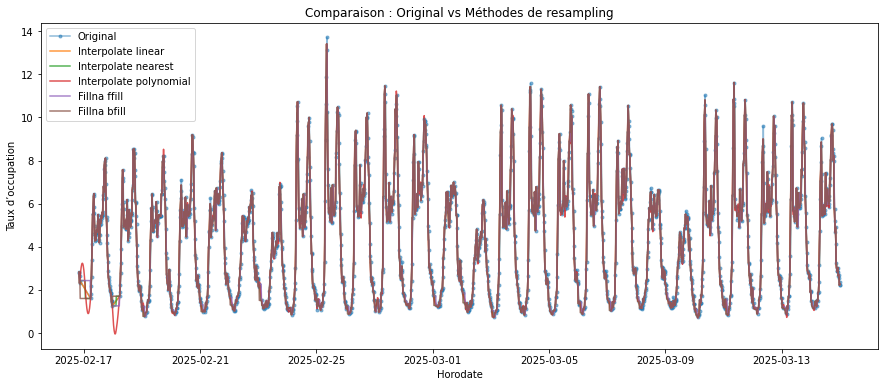

In [78]:
# Nettoyage des doublons :
original_clean = df_trafic[['taux_occupation']].groupby(df_trafic.index).mean()

# Création de la grille régulière 15 min :
resample_base = original_clean.resample('15min').mean()

# Méthodes de remplissage :
resample_interp = resample_base.interpolate(method='linear')
resample_nearest = resample_base.interpolate(method='nearest')
resample_poly = resample_base.interpolate(method='polynomial', order=2)
resample_ffill = resample_base.ffill()
resample_bfill = resample_base.bfill()

# Fonction de calcul des métriques :
def calculate_metrics_resample(original, resampled, method='floor', freq='15min'):
    if method == 'floor':
        original = original.copy()
        original['horodate_resample'] = original.index.floor(freq)
    elif method == 'round':
        original = original.copy()
        original['horodate_resample'] = original.index.round(freq)
    else:
        raise ValueError("Method must be 'floor' or 'round'.")

    merged = original.merge(
        resampled.rename(columns={'taux_occupation': 'resample'}),
        left_on='horodate_resample',
        right_index=True
    ).dropna()

    mae = mean_absolute_error(merged['taux_occupation'], merged['resample'])
    rmse = np.sqrt(mean_squared_error(merged['taux_occupation'], merged['resample']))
    mape = (np.abs((merged['taux_occupation'] - merged['resample']) / (merged['taux_occupation'] + 1e-8))).mean() * 100
    n_points = len(merged)
    return mae, rmse, mape, n_points

# Calcul des métriques :
methods = [
    ('Interpolate linear', resample_interp, 'floor', '15min'),
    ('Interpolate nearest', resample_nearest, 'floor', '15min'),
    ('Interpolate polynomial (order=2)', resample_poly, 'floor', '15min'),
    ('Fillna ffill', resample_ffill, 'floor', '15min'),
    ('Fillna bfill', resample_bfill, 'floor', '15min')
]

results = []
for name, df_method, align_method, freq in methods:
    mae, rmse, mape, n_points = calculate_metrics_resample(original_clean, df_method, align_method, freq)
    results.append((name, mae, rmse, mape, n_points))

# Affichage des métriques :
print("Méthode\t\t\t\t\tMAE\t\tRMSE\t\tMAPE\t\tPoints comparés")
for name, mae, rmse, mape, n_points in results:
    print(f"{name:35}\t{mae:.3f}\t\t{rmse:.3f}\t\t{mape:.2f}%\t\t{n_points}")

# 🟠 VISUALISATION (Graphiques de comparaison) :
plt.figure(figsize=(15, 6))
plt.plot(original_clean.index, original_clean['taux_occupation'], label='Original', linestyle='-', alpha=0.5, marker='o', markersize=3)

# Tu peux commenter les lignes que tu ne veux pas afficher :
plt.plot(resample_interp.index, resample_interp['taux_occupation'], label='Interpolate linear', linestyle='-', alpha=0.8)
plt.plot(resample_nearest.index, resample_nearest['taux_occupation'], label='Interpolate nearest', linestyle='-', alpha=0.8)
plt.plot(resample_poly.index, resample_poly['taux_occupation'], label='Interpolate polynomial', linestyle='-', alpha=0.8)
plt.plot(resample_ffill.index, resample_ffill['taux_occupation'], label='Fillna ffill', linestyle='-', alpha=0.8)
plt.plot(resample_bfill.index, resample_bfill['taux_occupation'], label='Fillna bfill', linestyle='-', alpha=0.8)

plt.legend()
plt.title('Comparaison : Original vs Méthodes de resampling')
plt.xlabel('Horodate')
plt.ylabel('Taux d’occupation')
plt.show()


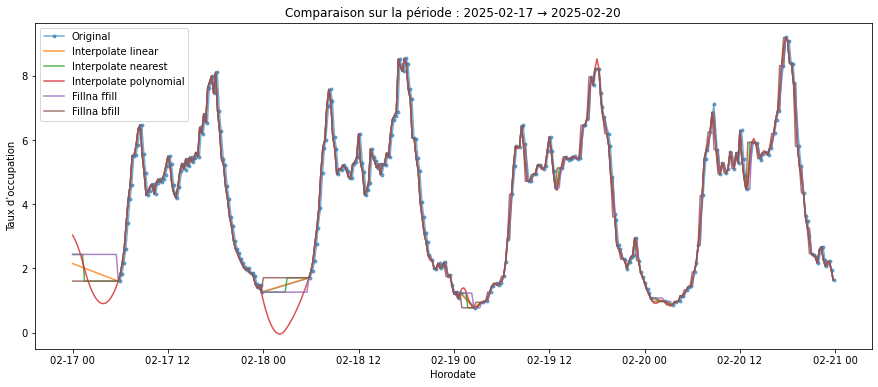

In [79]:

# 🟠 Définis ici ta période de zoom :
start_date = '2025-02-17'
end_date = '2025-02-20'

# 🟣 Filtrer l’original et les méthodes resamplées sur cette période :
original_zoom = original_clean.loc[start_date:end_date]
interp_zoom = resample_interp.loc[start_date:end_date]
nearest_zoom = resample_nearest.loc[start_date:end_date]
poly_zoom = resample_poly.loc[start_date:end_date]
ffill_zoom = resample_ffill.loc[start_date:end_date]
bfill_zoom = resample_bfill.loc[start_date:end_date]

# 🟢 Visualisation zoomée :
plt.figure(figsize=(15, 6))
plt.plot(original_zoom.index, original_zoom['taux_occupation'], label='Original', linestyle='-', alpha=0.6, marker='o', markersize=3)

plt.plot(interp_zoom.index, interp_zoom['taux_occupation'], label='Interpolate linear', linestyle='-', alpha=0.8)
plt.plot(nearest_zoom.index, nearest_zoom['taux_occupation'], label='Interpolate nearest', linestyle='-', alpha=0.8)
plt.plot(poly_zoom.index, poly_zoom['taux_occupation'], label='Interpolate polynomial', linestyle='-', alpha=0.8)
plt.plot(ffill_zoom.index, ffill_zoom['taux_occupation'], label='Fillna ffill', linestyle='-', alpha=0.8)
plt.plot(bfill_zoom.index, bfill_zoom['taux_occupation'], label='Fillna bfill', linestyle='-', alpha=0.8)

plt.legend()
plt.title(f'Comparaison sur la période : {start_date} → {end_date}')
plt.xlabel('Horodate')
plt.ylabel('Taux d’occupation')
plt.show()


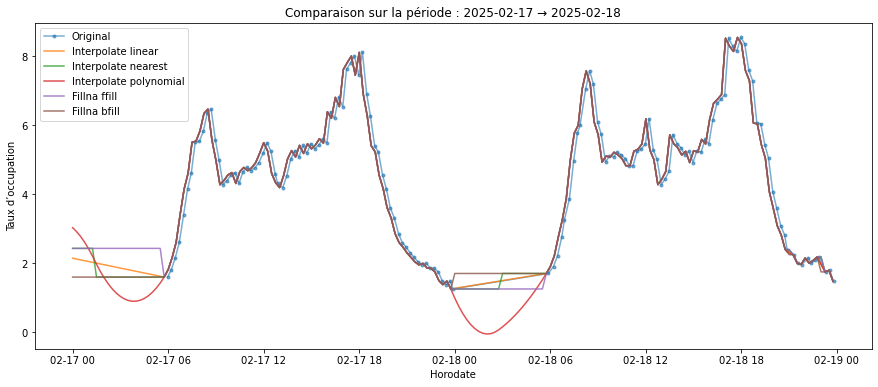

In [80]:

# 🟠 Définis ici ta période de zoom :
start_date = '2025-02-17'
end_date = '2025-02-18'

# 🟣 Filtrer l’original et les méthodes resamplées sur cette période :
original_zoom = original_clean.loc[start_date:end_date]
interp_zoom = resample_interp.loc[start_date:end_date]
nearest_zoom = resample_nearest.loc[start_date:end_date]
poly_zoom = resample_poly.loc[start_date:end_date]
ffill_zoom = resample_ffill.loc[start_date:end_date]
bfill_zoom = resample_bfill.loc[start_date:end_date]

# 🟢 Visualisation zoomée :
plt.figure(figsize=(15, 6))
plt.plot(original_zoom.index, original_zoom['taux_occupation'], label='Original', linestyle='-', alpha=0.6, marker='o', markersize=3)

plt.plot(interp_zoom.index, interp_zoom['taux_occupation'], label='Interpolate linear', linestyle='-', alpha=0.8)
plt.plot(nearest_zoom.index, nearest_zoom['taux_occupation'], label='Interpolate nearest', linestyle='-', alpha=0.8)
plt.plot(poly_zoom.index, poly_zoom['taux_occupation'], label='Interpolate polynomial', linestyle='-', alpha=0.8)
plt.plot(ffill_zoom.index, ffill_zoom['taux_occupation'], label='Fillna ffill', linestyle='-', alpha=0.8)
plt.plot(bfill_zoom.index, bfill_zoom['taux_occupation'], label='Fillna bfill', linestyle='-', alpha=0.8)

plt.legend()
plt.title(f'Comparaison sur la période : {start_date} → {end_date}')
plt.xlabel('Horodate')
plt.ylabel('Taux d’occupation')
plt.show()


La courbe rouge interpolate polynomial semble representer un schema normal


Nombre de gros trous (> 0 days 00:30:00): 176
Exemples des gros trous :
horodatage
2025-02-17 05:58:00   0 days 08:56:00
2025-02-18 05:52:00   0 days 06:00:00
2025-02-19 02:42:00   0 days 01:49:00
2025-02-19 03:37:00   0 days 00:55:00
2025-02-19 04:08:00   0 days 00:31:00
Name: horodatage, dtype: timedelta64[ns]


/Users/manu/opt/anaconda3/envs/Projet2/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


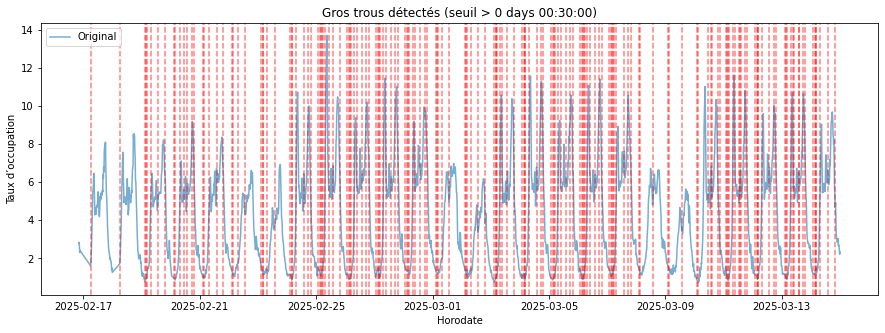

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ⚡ Utiliser ton original nettoyé :
original_clean = df_trafic[['taux_occupation']].groupby(df_trafic.index).mean()

# 🟠 Calcul des écarts entre chaque horodate (différence entre deux timestamps) :
gaps = original_clean.index.to_series().diff().dropna()

# 🟣 Définis ici ton seuil pour dire "c’est un gros trou" (exemple : 30 minutes) :
gap_threshold = pd.Timedelta('30min')

# 🟢 Trouver les endroits où l’écart est plus grand que le seuil :
big_gaps = gaps[gaps > gap_threshold]

print(f"\nNombre de gros trous (> {gap_threshold}): {big_gaps.shape[0]}")
print("Exemples des gros trous :")
print(big_gaps.head())

# 🔵 Visualisation des gros trous :
plt.figure(figsize=(15, 5))
plt.plot(original_clean.index, original_clean['taux_occupation'], label='Original', linestyle='-', alpha=0.6)
for ts in big_gaps.index:
    plt.axvline(x=ts, color='red', linestyle='--', alpha=0.5)
plt.title(f"Gros trous détectés (seuil > {gap_threshold})")
plt.xlabel('Horodate')
plt.ylabel('Taux d’occupation')
plt.legend()
plt.show()


## Saisonnalité et tendances

Les données ne sont pas à fréquences fixes

### Resampler le dataset

objectif : Trouver quelle méthode de rééchantillonnage ou d’alignement perturbe le moins mes données d’origine

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ⚡ 1. Nettoyer les doublons : moyenne si plusieurs valeurs au même horodate
original_clean = df_trafic[['taux_occupation']].groupby(df_trafic.index).mean()

# 🟠 2. Appliquer les différentes méthodes de resampling :

# Méthode 1 : Resample + mean + interpolate
df_resampled_15min = original_clean.resample('15min').mean().interpolate()
df_resampled_10min = original_clean.resample('10min').mean().interpolate()

# Méthode 2 : Resample + mean (PAS d’interpolation)
df_resampled_15min_no_interp = original_clean.resample('15min').mean()
df_resampled_10min_no_interp = original_clean.resample('10min').mean()

# Méthode 3 : Arrondi au quart d’heure + groupby + mean
original_clean['horodate_rounded'] = original_clean.index.round('15min')
df_grouped = original_clean.groupby('horodate_rounded')[['taux_occupation']].mean()

# 🟣 3. Fonction pour calculer les métriques AVEC alignement correct :
def calculate_metrics_resample(original, resampled, method='floor', freq='15min'):
    if method == 'floor':
        original = original.copy()
        original['horodate_resample'] = original.index.floor(freq)
    elif method == 'round':
        original = original.copy()
        original['horodate_resample'] = original.index.round(freq)
    else:
        raise ValueError("Method must be 'floor' or 'round'.")

    merged = original.merge(
        resampled.rename(columns={'taux_occupation': 'resample'}),
        left_on='horodate_resample',
        right_index=True
    ).dropna()

    mae = mean_absolute_error(merged['taux_occupation'], merged['resample'])
    rmse = np.sqrt(mean_squared_error(merged['taux_occupation'], merged['resample']))
    mape = (np.abs((merged['taux_occupation'] - merged['resample']) / (merged['taux_occupation'] + 1e-8))).mean() * 100
    n_points = len(merged)
    return mae, rmse, mape, n_points

# 🟡 4. Calcul des métriques pour chaque méthode :

# Resample 15min + interpolate
metrics_15min_interp = calculate_metrics_resample(original_clean, df_resampled_15min, method='floor', freq='15min')
# Resample 10min + interpolate
metrics_10min_interp = calculate_metrics_resample(original_clean, df_resampled_10min, method='floor', freq='10min')
# Resample 15min no interpolate
metrics_15min_no_interp = calculate_metrics_resample(original_clean, df_resampled_15min_no_interp, method='floor', freq='15min')
# Resample 10min no interpolate
metrics_10min_no_interp = calculate_metrics_resample(original_clean, df_resampled_10min_no_interp, method='floor', freq='10min')
# Arrondi + groupby (round utilisé dans le groupby → on utilise 'round')
metrics_grouped = calculate_metrics_resample(original_clean, df_grouped, method='round', freq='15min')

# 🟢 5. Affichage clair des résultats :
print("Méthode\t\t\t\tMAE\t\tRMSE\t\tMAPE\t\tPoints comparés")
print(f"Resample 15min + interpolate\t{metrics_15min_interp[0]:.3f}\t\t{metrics_15min_interp[1]:.3f}\t\t{metrics_15min_interp[2]:.2f}%\t\t{metrics_15min_interp[3]}")
print(f"Resample 10min + interpolate\t{metrics_10min_interp[0]:.3f}\t\t{metrics_10min_interp[1]:.3f}\t\t{metrics_10min_interp[2]:.2f}%\t\t{metrics_10min_interp[3]}")
print(f"Resample 15min no interpolate\t{metrics_15min_no_interp[0]:.3f}\t\t{metrics_15min_no_interp[1]:.3f}\t\t{metrics_15min_no_interp[2]:.2f}%\t\t{metrics_15min_no_interp[3]}")
print(f"Resample 10min no interpolate\t{metrics_10min_no_interp[0]:.3f}\t\t{metrics_10min_no_interp[1]:.3f}\t\t{metrics_10min_no_interp[2]:.2f}%\t\t{metrics_10min_no_interp[3]}")
print(f"Arrondi + groupby\t\t{metrics_grouped[0]:.3f}\t\t{metrics_grouped[1]:.3f}\t\t{metrics_grouped[2]:.2f}%\t\t{metrics_grouped[3]}")


Méthode				MAE		RMSE		MAPE		Points comparés
Resample 15min + interpolate	0.013		0.054		0.37%		1832
Resample 10min + interpolate	0.000		0.001		0.00%		1832
Resample 15min no interpolate	0.013		0.054		0.37%		1832
Resample 10min no interpolate	0.000		0.001		0.00%		1832
Arrondi + groupby		0.033		0.094		0.77%		1832


Cocnlusion : 
Resample 10min (avec ou sans interpolate)
✅ Erreur quasi nulle → très fidèle à l’original.

Resample 15min (avec ou sans interpolate)
➡️ Erreur légèrement plus élevée (MAE 0.013), mais toujours très faible.

Arrondi + groupby (quart d’heure)
🔸 Erreur un peu plus forte (MAE 0.033) → logique, car tu n’es pas vraiment en train de resampler, tu arrondis → certains points sont "poussés" hors de leur créneau naturel.

/Users/manu/opt/anaconda3/envs/Projet2/lib/python3.9/site-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
/Users/manu/opt/anaconda3/envs/Projet2/lib/python3.9/site-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
/Users/manu/opt/anaconda3/envs/Projet2/lib/python3.9/site-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
/Users/manu/opt/anaconda3/envs/Projet2/lib/python3.9/site-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)


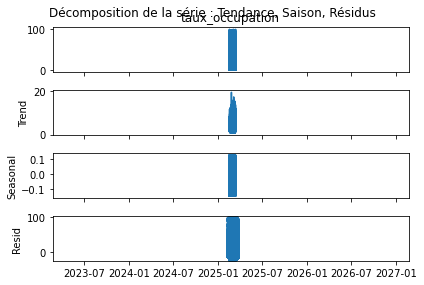

In [ ]:
result = seasonal_decompose(df_trafic['taux_occupation'], model='additive', period=96)

result.plot()
plt.suptitle('Décomposition de la série : Tendance, Saison, Résidus')
plt.show()